# Data Comparison Visualization

This notebook compares datasets across all timesteps and identifies differences.

In [1]:
# Parameters (injected by papermill)
ref_file = ""
new_file = ""
variables = ["ffmc", "dmc", "dc", "isi", "bui", "fwi"]
shapefile_path = "../shp/ecos.shp"
qc_utils_path = ""  # Path to qc_utils.py directory

In [2]:
# Parameters
variables = ["hursmin"]
ref_file = "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/original_dataset/bias_corrected/CNRM-CM6-1-HR/hursmin_CNRM-CM6-1-HR_2066.nc"
new_file = "/import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/output_shpmask_hursmin_clip/bias_corrected/CNRM-CM6-1-HR/hursmin_CNRM-CM6-1-HR_2066.nc"
shapefile_path = "shp/ecos.shp"
qc_utils_path = "/import/home/jdpaul3/boreal_fire_weather/processing/qc"


In [3]:
import sys
import warnings

# Add qc_utils path to Python path
if qc_utils_path and qc_utils_path not in sys.path:
    sys.path.insert(0, qc_utils_path)

from qc_utils import (
    load_datasets_and_shapefile,
    run_comparison_analysis,
    display_summary_tables,
    plot_max_value_differences,
    plot_max_nan_differences,
    generate_qc_summary,
)

warnings.filterwarnings("ignore")

print(f"Reference file: {ref_file}")
print(f"New file: {new_file}")
print(f"Variables to compare: {variables}")

Reference file: /import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/original_dataset/bias_corrected/CNRM-CM6-1-HR/hursmin_CNRM-CM6-1-HR_2066.nc
New file: /import/beegfs/CMIP6/jdpaul3/boreal_fire_weather_data/output_shpmask_hursmin_clip/bias_corrected/CNRM-CM6-1-HR/hursmin_CNRM-CM6-1-HR_2066.nc
Variables to compare: ['hursmin']


In [4]:
ds_ref, ds_new, gdf, bounds = load_datasets_and_shapefile(
    ref_file, new_file, shapefile_path
)

Loading datasets...


Shapefile bounds: [-163.89285272   47.55902851  -55.58034561   69.00630609]
Dataset reference shape: FrozenMappingWarningOnValuesAccess({'lat': 178, 'lon': 569, 'time': 365})
Dataset new shape: FrozenMappingWarningOnValuesAccess({'lat': 178, 'lon': 569, 'time': 365})
Number of timesteps: 365


## Timestep-by-Timestep Comparison

Comparing all timesteps to identify where differences occur.

In [5]:
comparison_results = run_comparison_analysis(ds_ref, ds_new, variables)

Comparing all timesteps...

Analyzing HURSMIN...


  Total timesteps: 365
  Timesteps with differences: 106
  Max absolute difference: 145.003677
  Max NaN changes: 0

Comparison complete!


## Summary Statistics for Differing Timesteps

Tables showing summary statistics for each timestep where differences were detected.

In [6]:
display_summary_tables(comparison_results, variables)


HURSMIN - Timesteps with Differences
      Date  Mean (Ref)  Std (Ref)  Mean (New)  Std (New)  Max Abs Diff  Value Diffs  NaN Changes
2066-01-19   74.412003   7.203000   74.411003   7.200000      8.845000            6            0
2066-01-20   72.803001   8.694000   72.777000   8.592000     28.256001           42            0
2066-01-22   73.867996   6.640000   73.831001   6.404000     57.372002           20            0
2066-01-23   72.678001   6.580000   72.656998   6.453000     35.206001           17            0
2066-01-24   72.860001   9.741000   72.473999   7.420000    118.953003          156            0
2066-01-25   71.042999   9.605000   70.709000   7.568000    128.895004          143            0
2066-01-26   71.205002   9.230000   71.177002   9.110000     36.880001           28            0
2066-01-27   71.367996   9.303000   71.362999   9.282000     20.184999            6            0
2066-02-09   64.261002   8.596000   64.259003   8.590000     11.502000            2      

## Visualization: Maximum Value Difference

Plotting the timestep with the greatest maximum absolute difference in values.


HURSMIN: Plotting timestep with maximum value difference
  Time: 2066-12-19 12:00:00
  Max absolute difference: 145.003677


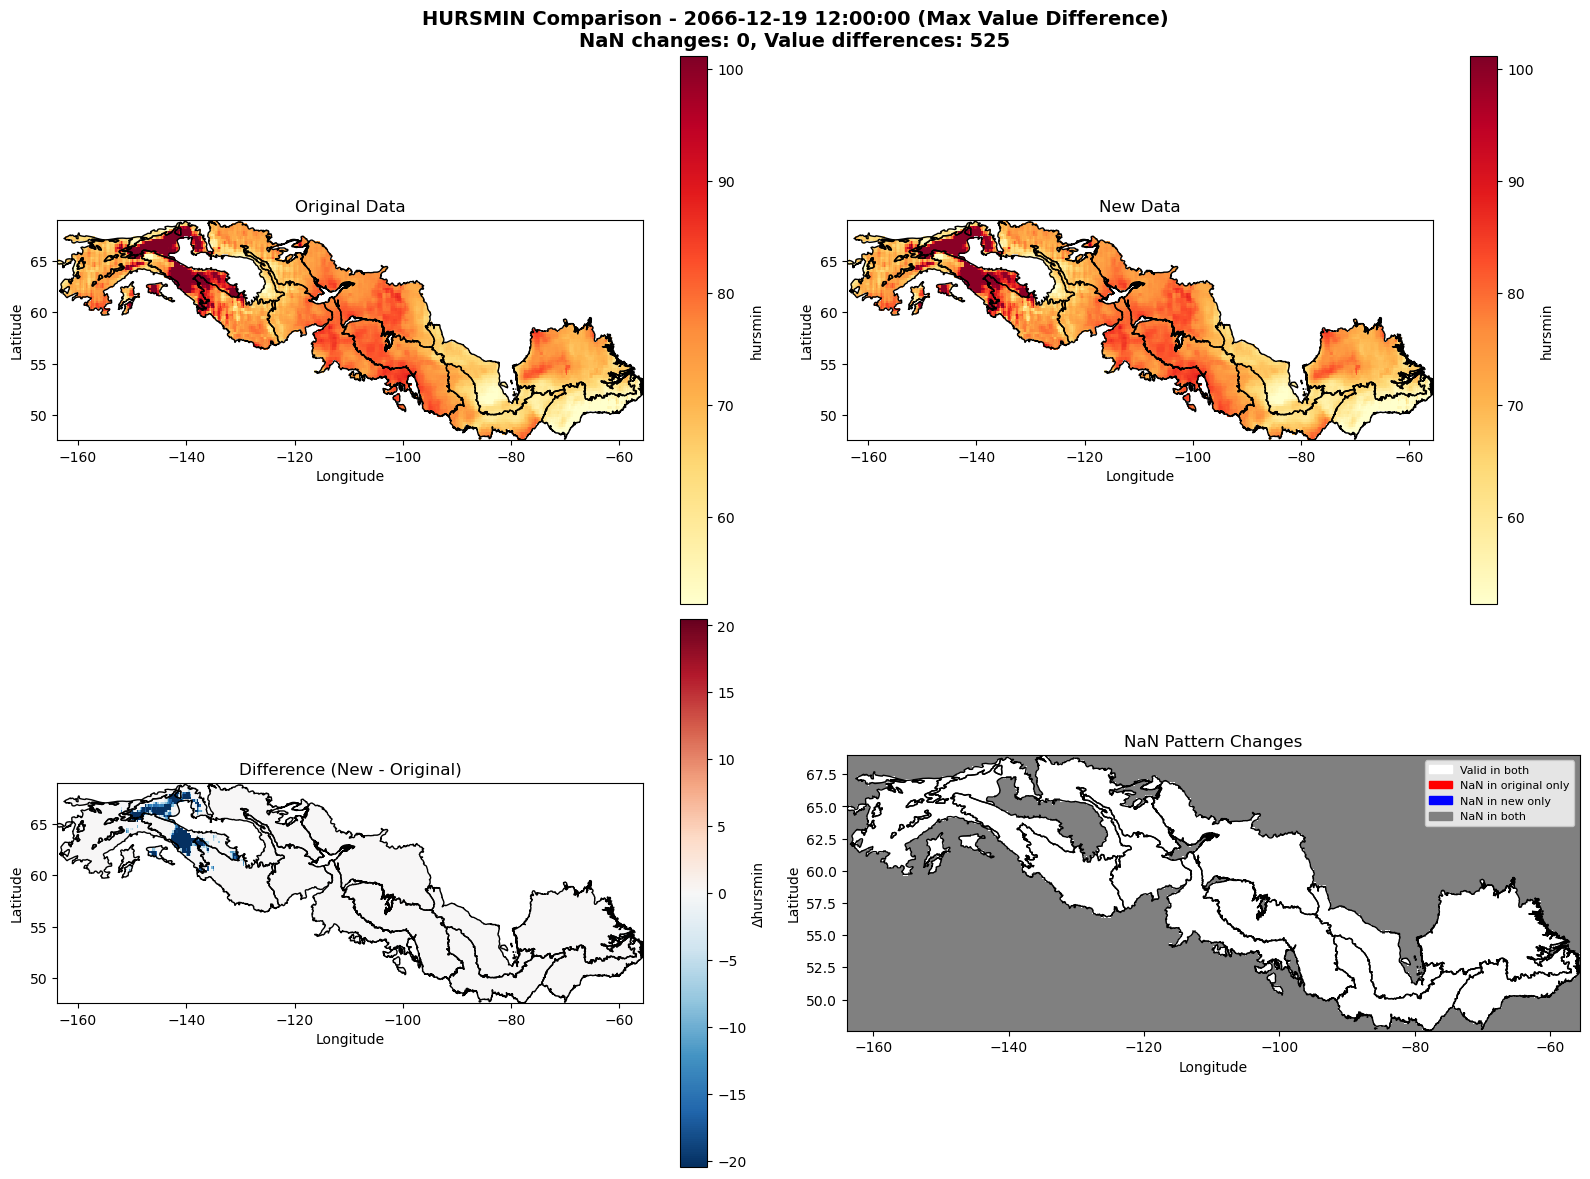

In [7]:
plot_max_value_differences(ds_ref, ds_new, comparison_results, variables, gdf, bounds)

## Visualization: Maximum NaN Pattern Difference

Plotting the timestep with the greatest number of NaN pattern changes.


HURSMIN: Plotting timestep with maximum NaN changes
  Time: 2066-01-19 12:00:00
  NaN changes: 0


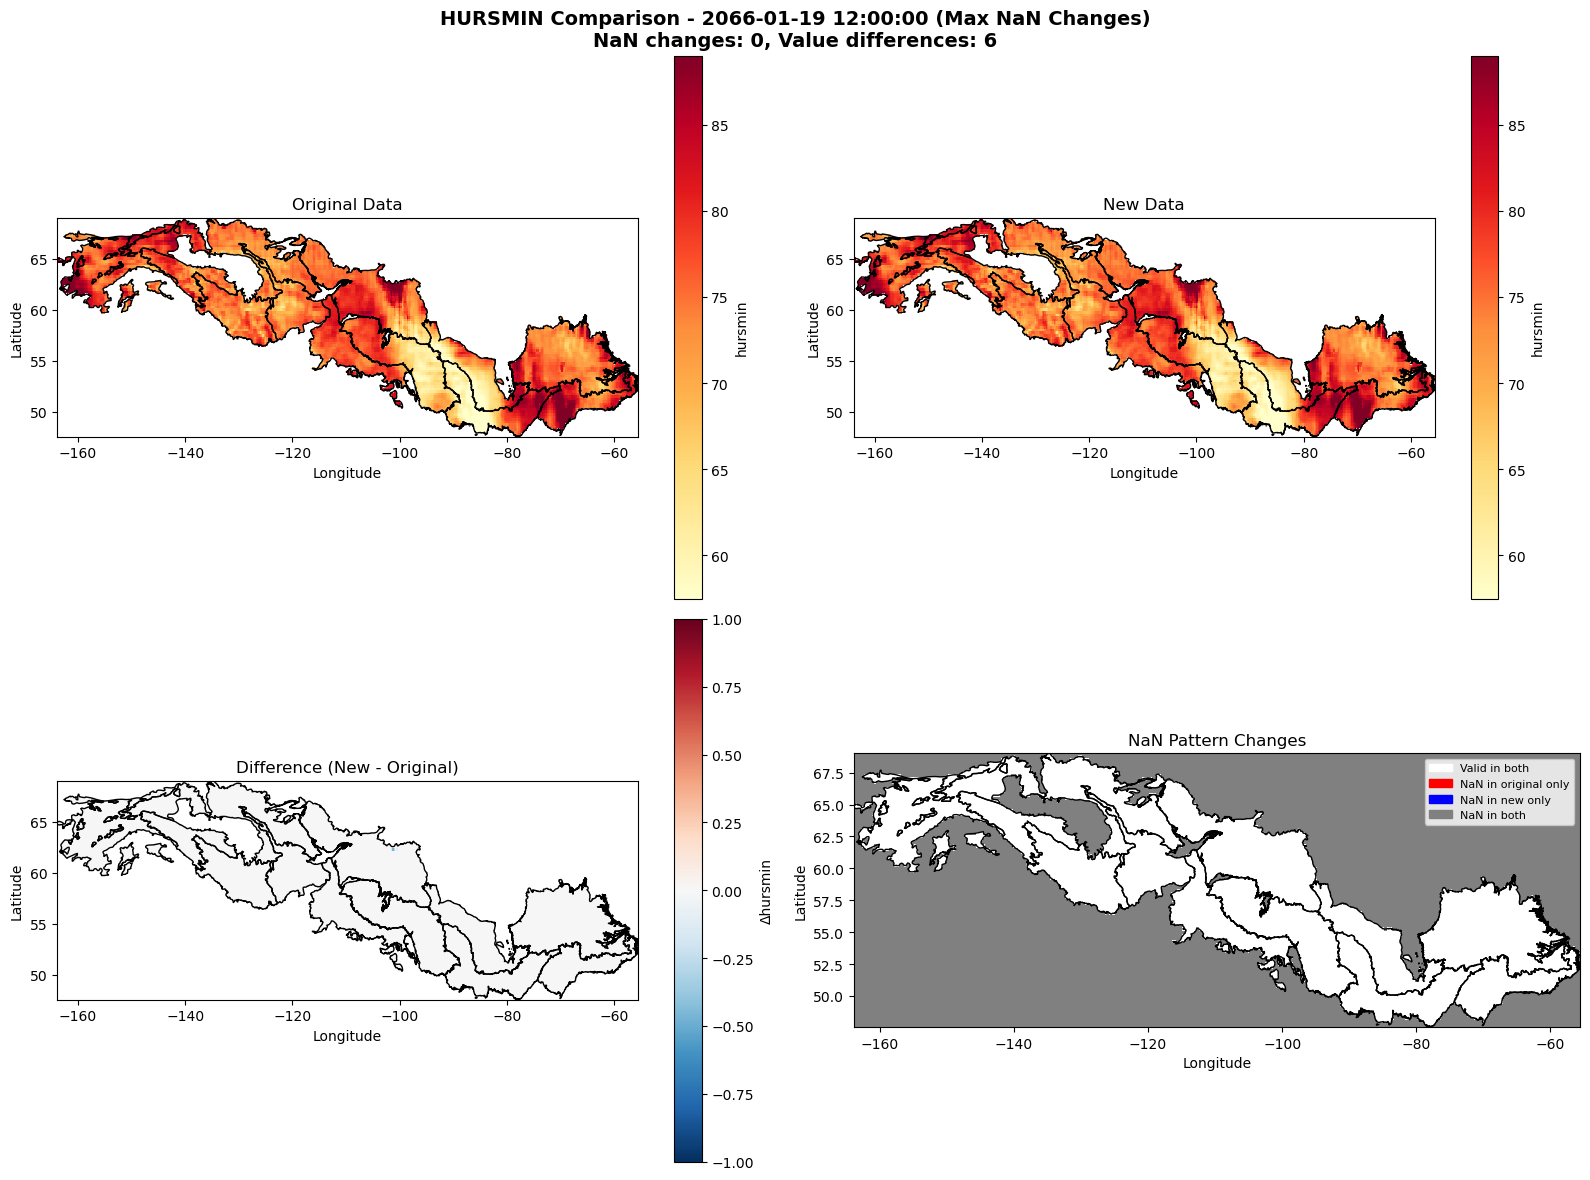

In [8]:
plot_max_nan_differences(ds_ref, ds_new, comparison_results, variables, gdf, bounds)

In [9]:
print(generate_qc_summary(comparison_results, variables))

## QC Summary

### HURSMIN
- **Total timesteps analyzed:** 365
- **Timesteps with differences:** 106
- ⚠️ **Differences detected**
  - Maximum value difference: 145.003677 on 2066-12-19
  - Maximum NaN changes: 0 cells on 2066-01-19
  - Total value differences: 3921 across all timesteps
  - Total NaN pattern changes: 0 across all timesteps



In [10]:
# Clean up
ds_ref.close()
ds_new.close()
print("\nDatasets closed. Analysis complete!")


Datasets closed. Analysis complete!
